# Tutorial for simple supervised classification learning

This tutorial is a simple walkthrough of supervised classification learning using the famous Iris flower dataset.

Goal: 
* Exploratory data analysis
* Fit logistic and svm clustering algorithim
* Optimize


In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets 

In [3]:
# Load dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [4]:
# Create Dataframes
iris_df = pd.DataFrame(features)
target_df = pd.Series(target)

In [5]:
target_df= target_df.map({k:v for (k,v) in enumerate(iris.target_names)})

In [6]:
iris_df = pd.concat([iris_df, target_df], axis = 1, ignore_index = True)

In [7]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Explore Data

In [12]:
iris_df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

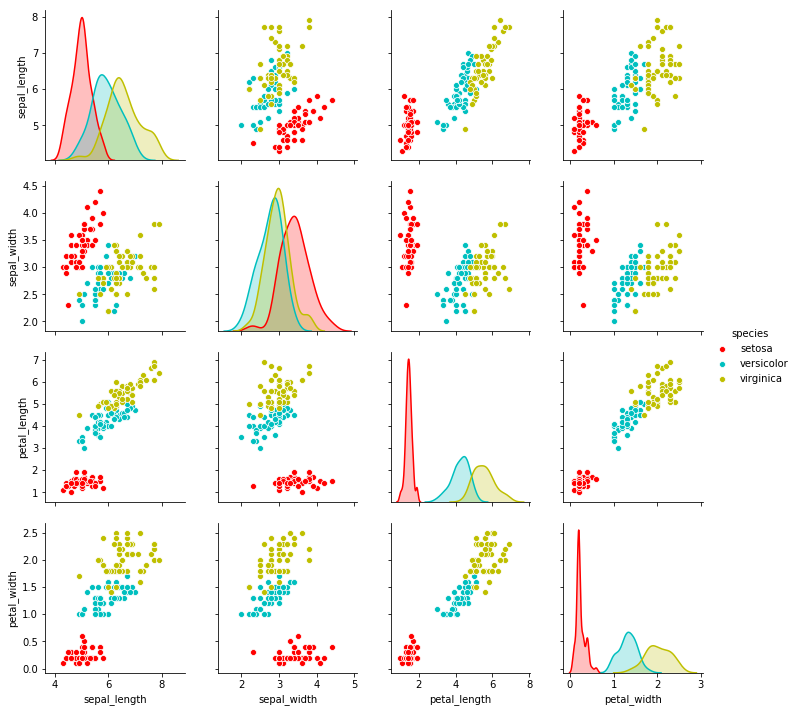

In [11]:
sns.pairplot(iris_df, hue = 'species', palette=["r", "c", "y"])

Setosa is easy to separate. Veriscolor and virginica have overlapping distributions

### Maximize class seperability with dimension reduction. 


Compare LDA and PCA and plot results to visualize